
# <center>THUẬT TOÁN TỐI ƯU ADAM </center> 
## <center>Nguyễn Quốc Dương$^1$</center>
<center> $^1$Học viên cao học, Khoa học dữ liệu ứng dụng, Đại học Quy Nhơn</center>

Trong file notebook này, tác giả trình bày một số nội dung sau:
* Lập trình từ đầu cho thuật toán tối ưu Adam.
* Hồi quy logistic trên tập dữ liệu ung thư vú (breast cancer) từ thư viện Sklearn sử dụng trình tối ưu theo thuật toán Adam.
* Thực nghiệm Adam và so sánh với các thuật toán cơ sở.

# 1. Lập trình từ đầu cho thuật toán tối ưu Adam.

In [1]:
# Lấy hàm sqrt từ thư viện math
from math import sqrt
# Thư viện numpy
import numpy as np
from numpy import asarray, arange
from numpy.random import rand
from numpy.random import seed
from numpy import meshgrid
# Thư viện matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
# Thư viện pandas
import pandas as pd
# Vẽ hình trong không gian 3 chiều 
from mpl_toolkits import mplot3d
# Nền hình vẽ, biểu đồ 
plt.style.use('seaborn-poster')
# Thư viện của cuốn sách Dive into Deep Learning
import d2l
# Thư viện các hàm toán học
import math
# Hàm optimize trong thư viện scipy
from scipy import optimize

In [2]:
# Xây dựng hàm mục tiêu
def objective(x, y):
    return x**2.0 + y**2.0

# Đạo hàm của hàm mục tiêu
def derivative(x, y):
    return asarray([x * 2.0, y * 2.0])


def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
    """
    XÂY DỰNG THUẬT TOÁN TỐI ƯU ADAM
    """
    
    # Nghiệm của bài toán tối ưu
    solutions = []
    # Khởi tạo điểm ban đầu một cách ngẫu nhiên
    x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    score = objective(x[0], x[1])
    # Khởi tạo moment bậc nhất
    m = [0.0 for _ in range(bounds.shape[0])]
    # Khởi tạo moment bậc hai
    v = [0.0 for _ in range(bounds.shape[0])]
    # Cập nhật gradient descent
    for t in range(n_iter):
        # Tính gradient của g(t)
        g = derivative(x[0], x[1])
        # Xây dựng nghiệm 
        for i in range(bounds.shape[0]):
            # m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
            m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
            # v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
            v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
            # mhat(t) = m(t) / (1 - beta1(t))
            mhat = m[i] / (1.0 - beta1**(t+1))
            # vhat(t) = v(t) / (1 - beta2(t))
            vhat = v[i] / (1.0 - beta2**(t+1))
            # x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + ep)
            x[i] = x[i] - alpha * mhat / (sqrt(vhat) + eps)

        score = objective(x[0], x[1])
        # Lưu list solutions để theo dõi
        solutions.append(x.copy())
        # Hiển thị quá trình
        print('--> %d f(%s) = %.5f' % (t, x, score))
    return solutions

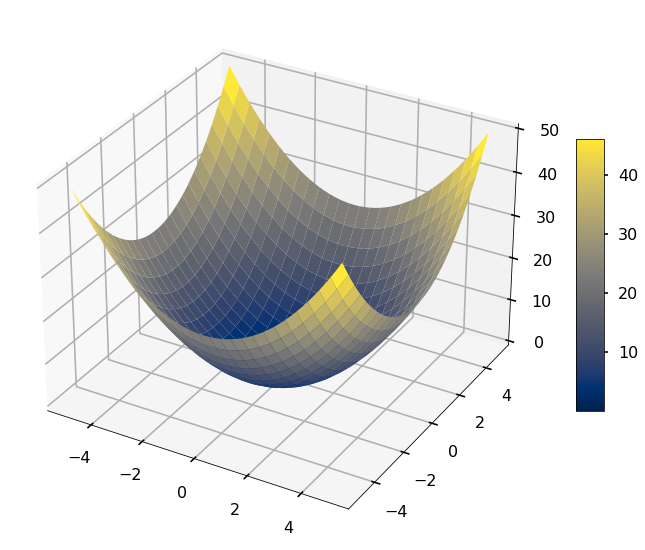

In [3]:
# BIỂU DIỄN HÀM MỤC TIÊU TRONG KHÔNG GIAN 3 CHIỀU
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')
x = np.arange(-5, 5.1, 0.2)
y = np.arange(-5, 5.1, 0.2)
X, Y = np.meshgrid(x, y)
# Hàm mục tiêu
Z = X**2.0 + Y**2.0
surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)
fig.colorbar(surf, shrink=0.5, aspect=10)
# Hiển thị hình vẽ
plt.show()

Từ hình vẽ trên, ta có thể thấy hàm mục tiêu có cực tiểu toàn cục tại $f(0, 0) = 0$.

In [4]:
# Tạo số giả ngẫu nhiên
seed(1)
# Xác định phạm vi cho đầu vào
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# Tổng số lần gặp lại
n_iter = 60
# steps size
alpha = 0.02
# Chọn giá trị cho các tham số trọng số không âm
# hệ số average gradient
beta1 = 0.8
# hệ số average squared gradient
beta2 = 0.999
# Tìm nghiệm gradient descent theo adam
solutions = adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2)

--> 0 f([-0.14595599  0.42064899]) = 0.19825
--> 1 f([-0.12613855  0.40070573]) = 0.17648
--> 2 f([-0.10665938  0.3808601 ]) = 0.15643
--> 3 f([-0.08770234  0.3611548 ]) = 0.13812
--> 4 f([-0.06947941  0.34163405]) = 0.12154
--> 5 f([-0.05222756  0.32234308]) = 0.10663
--> 6 f([-0.03620086  0.30332769]) = 0.09332
--> 7 f([-0.02165679  0.28463383]) = 0.08149
--> 8 f([-0.00883663  0.26630707]) = 0.07100
--> 9 f([0.00205801 0.24839209]) = 0.06170
--> 10 f([0.01088844 0.23093228]) = 0.05345
--> 11 f([0.01759677 0.2139692 ]) = 0.04609
--> 12 f([0.02221425 0.19754214]) = 0.03952
--> 13 f([0.02485859 0.18168769]) = 0.03363
--> 14 f([0.02572196 0.16643933]) = 0.02836
--> 15 f([0.02505339 0.15182705]) = 0.02368
--> 16 f([0.02313917 0.13787701]) = 0.01955
--> 17 f([0.02028406 0.12461125]) = 0.01594
--> 18 f([0.01679451 0.11204744]) = 0.01284
--> 19 f([0.01296436 0.10019867]) = 0.01021
--> 20 f([0.00906264 0.08907337]) = 0.00802
--> 21 f([0.00532366 0.07867522]) = 0.00622
--> 22 f([0.00193919 0.0

Trong trường hợp này, chúng ta có thể thấy rằng một giải pháp gần như tối ưu đã được tìm thấy sau 53 lần lặp lại tìm kiếm.

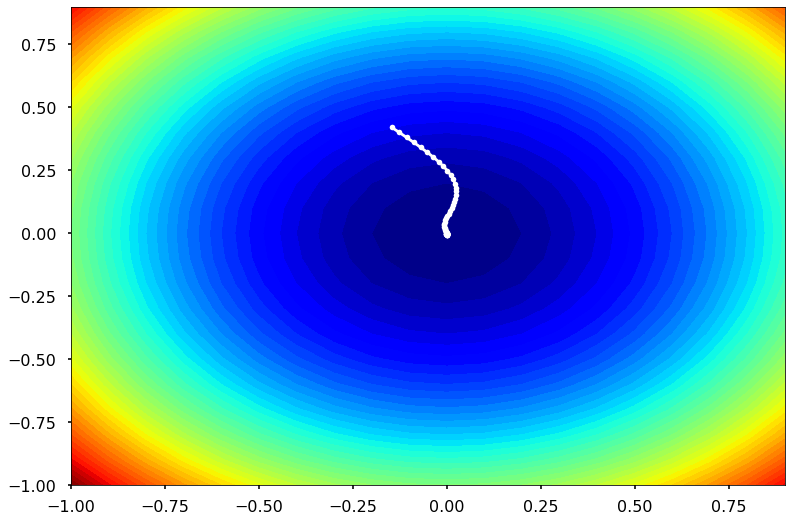

In [5]:
# BIỂU ĐỒ CONTOUR ĐỂ XEM QUÁ TRÌNH TỐI ƯU
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
x, y = meshgrid(xaxis, yaxis)
results = objective(x, y)
pyplot.contourf(x, y, results, levels=50, cmap='jet')
solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
pyplot.show()

# 2. Hồi quy logistic trên tập dữ liệu ung thư vú (breast cancer) từ thư viện Sklearn sử dụng trình tối ưu theo thuật toán Adam.

## 2.1. Logistic Regression với thuật toán tối ưu Adam.

In [6]:
# Tải các tập dữ liệu từ thư viện sklearn
from sklearn import datasets
# Hàm chia dữ liệu để train, test để huấn luyện mô hình 
from sklearn.model_selection import train_test_split
# StandardScaler để chuẩn hóa dữ liệu trong quá trình preprocessing
from sklearn.preprocessing import StandardScaler
# Các metric đánh gía mô hình từ thư viện sklearn
from sklearn.metrics import accuracy_score, f1_score, auc, roc_auc_score, roc_curve
# Hàm xây dựng hình Logistic Regression từ thư viện sklearn
from sklearn.linear_model import LogisticRegression

In [7]:
# Load tập dữ liệu ung thư vú từ thư viện sklearn
data = datasets.load_breast_cancer()

In [8]:
# X chứa các feature cho dự báo
X = data['data']
# Y là biến mục tiêu
Y = data['target']

In [9]:
# Chia tập dữ liệu theo các feature train, test và target train, test
# Thuộc tính stratify để chia train, test cân đối về target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = Y, random_state = 8,  shuffle = True)

In [10]:
# Hiện thị số lượng sample và số feature được chia trên tập train và test
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [11]:
# CChuẩn hóa dữ liệu bằng thư viện scikit-learn với StandardScaler cho tập train và test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [12]:
def sigmoid(X):
    # Hàm sigmoid được lập trình theo công thức
    return 1/(1+math.exp(-X)) 
def log_loss(y, y_):
    # Hàm loss được lập trình theo công thức
    return -1*(y*math.log(sigmoid(y_)) + (1-y)*math.log(1-sigmoid(y_)))
def cal_grad(y,y_,x):
    return (y - sigmoid(y_)) * (x.reshape(-1, 1)) 

In [13]:
def train(X, Y, epochs = 500):
    """
    Train mô hình hồi quy Logistic sử dụng trình tối ưu theo Adam.
    """
    alpha = 0.01
    beta_1 = 0.9
    beta_2 = 0.99
    
    # M là số sample train
    M = X.shape[0]
    # N là số feature train
    N = X.shape[1]
    # Tạo random mảng w
    w = np.random.uniform(-1, 1, size = N).reshape(N, 1)
    epsilon = 1e-8
    
    # Khởi tạo moment bậc 1
    m_t = 0 
    # Khởi tạo moment bậc 2
    v_t = 0 
    # Số lần lặp
    iter = 0
    cnt =0
    
    # Train theo số epoch đã được chọn
    for epoch in range(1, epochs+1):
        cnt+=1
        for i in range(M):
            iter+=1
            y = Y[i]
            
            # Hồi quy logistic
            y_ = np.dot(w.T, X[i].reshape(N, 1)) 
            g_t = -(1.0/M)*cal_grad(y,y_,X[i])
            
            # Cập nhật giá trị moment bậc 1
            m_t = beta_1*m_t + (1-beta_1)*g_t 
            # Cập nhật giá trị moment bậc 2
            v_t = beta_2*v_t + (1-beta_2)*(g_t*g_t) 
            # Hiệu chỉnh độ chệch trong moment bậc 1
            m_hat = m_t/(1-(beta_1**iter)) 
            # Hiệu chỉnh độ chệch trong moment bậc 2
            v_hat = v_t/(1-(beta_2**iter)) 
            w_prev = w  
            
            # Cập nhật nghiệm
            w = w - (alpha*m_hat)/(np.sqrt(v_hat)+epsilon) 
        
        if epoch % 100 == 0: 
            # Hiện thị kết quả của hàm loss tại những epoch % 100 == 0
            print('Kết quả của hàm loss:', log_loss(y, y_))
        if(log_loss(y,y_) < 1e-10):
            # Nếu hàm loss < 1e-10 thì dừng
            break
        
    print("Hội tụ tại epoch số {} và tổng số lần lặp được thực hiện = {}".format(cnt, iter))
    
    return w

In [14]:
# Nghiệm của bài toán
w = train(X_train, Y_train, epochs = 1000)

Kết quả của hàm loss: 8.831135826517301e-10
Hội tụ tại epoch số 147 và tổng số lần lặp được thực hiện = 62622


In [15]:
# Xây dựng hàm dự báo
def predict(X):
    y_pred = []
    for i in range(len(X)):
        # Tính toán các giá trị dự báo theo công thức và cập nhật kết quả vào list y_pred
        y_pred.append(np.round(sigmoid(np.dot(w.T, X[i].reshape(X.shape[1], 1)))))
    return y_pred

In [16]:
# Dự báo ung thư vú dựa trên tập test
y_pred = predict(X_test)

In [17]:
# Hiện thị độ chính xác của mô hình theo công thức accuracy
print("Accuracy theo Adam: {}".format(accuracy_score(Y_test, y_pred)))

Accuracy theo Adam: 0.972027972027972


## 2.2. Logistic Regression với sklearn.

In [18]:
# Khởi tạo mặc định mô hình Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, Y_train)
# Kết quả dự báo trên tập test
y_pred_ = clf.predict(X_test)

# Hiện thị độ chính xác của mô hình theo công thức accuracy
print("Accuracy theo thư viện sklearn: {}".format(accuracy_score(Y_test, y_pred_)))

Accuracy theo thư viện sklearn: 0.972027972027972


# 3. Thực nghiệm Adam và so sánh với các thuật toán cơ sở.

In [19]:
class Optimizer:
    """
    Xây dựng class chứa các thuật toán tối ưu như GD, GD_momentum, AdaGrad, RMSPROP, Adam.
    """
    def __init__(self,list_param,learnning_rate,max_epoch,gradf,function):
        
        self.param = np.asarray(list_param)
        self.learnning_rate = learnning_rate
        self.epoch = max_epoch
        self.gradf = gradf
        self.function = function

    def gd(self,dimention):
        param=self.param
        theta = [param]

        for i in range(self.epoch):
            param =np.add(param, - self.learnning_rate * self.gradf(param,self.function))
            theta.append(param)
            if np.linalg.norm(theta[-1]-theta[-2])<=1e-8:
                break

        print('epoch ',i, 'x:', param)
        return theta,i


    def GD_momentum(self):
        theta = [self.param]
        gamma=0.9
        v_old = np.zeros_like(self.param)

        for it in range(self.epoch):
            v_new = gamma*v_old + self.learnning_rate*self.gradf(theta[-1],self.function)
            theta_new = np.add(theta[-1], -1* v_new)
            theta.append(theta_new)
            v_old = v_new
            if np.linalg.norm(theta[-1]-theta[-2])<=1e-8:
                break

        print('epoch',it,'x',theta_new)
        return theta ,it


    def AdaGrad(self):
        eps=1e-6
        theta=[self.param]
        s=[]

        for i in range(theta[-1].shape[0]):
            s.append(0)

        s=np.asarray(s)
        for it in range(self.epoch):
            s=s + np.multiply(self.gradf(theta[-1] , self.function),self.gradf(theta[-1],self.function))
            theta_new = theta[-1]- np.multiply(self.learnning_rate / np.sqrt(s+np.ones(s.shape[0])*eps),self.gradf(theta[-1],self.function))
            theta.append(theta_new)
            if np.linalg.norm(theta[-1]-theta[-2])<=1e-8:
                break

        print('epoch',it,'x',theta_new)
        return theta,it


    def RMSPROP(self):
        eps=1e-6
        gamma=0.9
        theta=[self.param]
        s=[]

        for i in range(theta[-1].shape[0]):
            s.append(0)
        s=np.asarray(s)
        for it in range(self.epoch):
            s = gamma * s + (1 - gamma) * np.multiply(self.gradf(theta[-1],self.function),self.gradf(theta[-1],self.function))
            theta_new =theta[-1] - np.multiply(self.learnning_rate / np.sqrt(s+np.ones(s.shape[0])*eps),self.gradf(theta[-1],self.function))
            theta.append(theta_new)
            if np.linalg.norm(theta[-1]-theta[-2])<=1e-8:
                break
        print('epoch',it,'x',theta_new)
        return theta,it



    def Adam(self, alpha = 0.001, beta_1 = 0.9, beta_2 = 0.999):
        alpha = alpha
        beta_1 = beta_1
        beta_2 = beta_2
        eps = 1e-8
        theta = [self.param]
        m_t = np.zeros(theta[-1].shape[0])
        v_t = np.zeros(theta[-1].shape[0])
        for it in range(self.epoch):
            g_t = self.gradf(theta[-1],self.function)
            m_t = beta_1*m_t + (1-beta_1)*g_t
            v_t = beta_2*v_t + (1-beta_2)*(np.power(g_t, 2))
            m_cap = np.true_divide(m_t,(1-(beta_1**(it + 1))))
            v_cap = np.true_divide(v_t,(1-(beta_2**(it + 1))))
            theta_new = theta[-1] - np.true_divide(alpha*m_cap,(np.sqrt(v_cap)+np.ones(theta[-1].shape[0])*eps)) 
            theta.append(theta_new)
            if np.linalg.norm(theta[-1]-theta[-2])<=1e-8:
                break

        print('Adam: epoch',it,'x',theta_new)
        return theta,it

Lấy ví dụ về một hàm sau:
$$f(\mathbf{x}) = log(1+(\mid x\mid)^{2+sinx}).$$

In [20]:
def f(x):
    x=x[-1]
    return x*x +  10*math.sin(x)  

def gradf(x):
    x=x[-1]
    return np.asarray(2*x +  10*math.cos(x))  

def function(theta):
    x=theta[-1]
    return math.log(1+(abs(x))**(2+math.sin(x)))

def general_grad(theta,function):
    theta = np.asarray(theta)
    eps = np.ones(theta.shape[0])*(1e-6)
    return optimize.approx_fprime(theta, function, eps)  

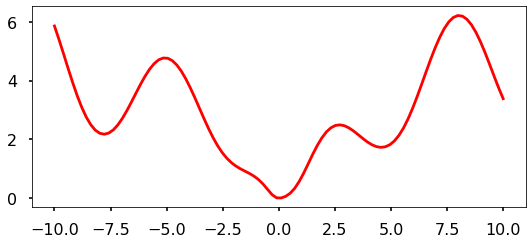

In [21]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

def f(x):
    return math.log(1+(abs(x))**(2+math.sin(x)))
f2 = np.vectorize(f)
x = np.linspace(-10, 10, 100)
plt.plot(x, f2(x), color='red')
plt.show()

Hàm số  có các giá trị nằm trong khoảng -9 đến 9 và có 3 điểm cực tiểu. Ta tiến hành khởi tạo ban đầu $x_0 = 2$,  $\alpha = 0.01$, $\beta_1 = 0.9$, $\beta_2 = 0.99$, kết quả của các thuật toán
đạt được như sau:

In [22]:
op = Optimizer(list_param=[2],learnning_rate=0.01,max_epoch=10000,gradf=general_grad,function=function)
gd = op.gd(1)
print('Gradient descent',(gd[0][-1]))
momentum = op.GD_momentum()
print('Momentum',(momentum[0][-1]))
adagrad = op.AdaGrad()
print('Adagrad',(adagrad[0][-1]))
rmsprop = op.RMSPROP()
print('RMSprop',(rmsprop[0][-1]))
adam = op.Adam(alpha = 0.01, beta_1 = 0.9, beta_2 = 0.99)
print('Adam',(adam[0][-1]))

epoch  868 x: [-1.06608035e-08]
Gradient descent [-1.06608035e-08]
epoch 265 x [-2.17763624e-06]
Momentum [-2.17763624e-06]
epoch 9999 x [0.33193342]
Adagrad [0.33193342]
epoch 243 x [-4.99162169e-07]
RMSprop [-4.99162169e-07]
Adam: epoch 468 x [-3.24695097e-06]
Adam [-3.24695097e-06]


Từ kết quả trên, ta có thể  thấy với khởi tạo ban đầu lý tưởng, các thuật toán đều có thể hội tụ tốt trong thời gian ngắn. 

Ta tiến hành khởi tạo khó hơn $x_0 = 8$, $\alpha = 0.01$, $\beta_1 = 0.9$, $\beta_2 = 0.99$, kết quả của các thuật toán như sau:

In [23]:
op = Optimizer(list_param=[8],learnning_rate=0.01,max_epoch=10000,gradf=general_grad,function=function)
gd = op.gd(1)
print('Gradient descent',(gd[0][-1]))
momentum = op.GD_momentum()
print('Momentum',(momentum[0][-1]))
adagrad = op.AdaGrad()
print('Adagrad',(adagrad[0][-1]))
rmsprop = op.RMSPROP()
print('RMSprop',(rmsprop[0][-1]))
adam = op.Adam(alpha = 0.01, beta_1 = 0.9, beta_2 = 0.99)
print('Adam',(adam[0][-1]))

epoch  1433 x: [4.56611984]
Gradient descent [4.56611984]
epoch 296 x [4.56612179]
Momentum [4.56612179]
epoch 9999 x [5.64208075]
Adagrad [5.64208075]
epoch 382 x [4.56611898]
RMSprop [4.56611898]
Adam: epoch 670 x [4.56611995]
Adam [4.56611995]


Có thể thấy các thuật toán đều hội tụ đến điểm local minimum và không thể tới được điểm global minimum. Ta tăng $\alpha = 2$, kết quả như sau:

In [24]:
op = Optimizer(list_param=[8],learnning_rate=2,max_epoch=10000,gradf=general_grad,function=function)
gd = op.gd(1)
print('Gradient descent',(gd[0][-1]))
momentum = op.GD_momentum()
print('Momentum',(momentum[0][-1]))
adagrad = op.AdaGrad()
print('Adagrad',(adagrad[0][-1]))
rmsprop = op.RMSPROP()
print('RMSprop',(rmsprop[0][-1]))
adam = op.Adam(alpha = 2, beta_1 = 0.9, beta_2 = 0.99)
print('Adam',(adam[0][-1]))

epoch  9999 x: [5.0106917]
Gradient descent [5.0106917]
epoch 9999 x [-10976.70092115]
Momentum [-10976.70092115]
epoch 12 x [4.56611898]
Adagrad [4.56611898]
epoch 9999 x [0.90725303]
RMSprop [0.90725303]
Adam: epoch 9999 x [-0.06096236]
Adam [-0.06096236]


Từ kết quả trên, ta thấy duy nhất thuật toán Adam có thể tiến tới điểm global minimum nhờ hiệu ứng Heavy Ball with
Friction.

# Tài liệu tham khảo 

1.  https://machinelearningmastery.com/adam-optimization-from-scratch/
2. https://github.com/VinitSR7/Logistic-Regression-with-Advanced-Optimizers/blob/master/ADAM%20.ipynb